In [11]:
from netCDF4 import Dataset
import numpy as np
import sys
import xarray as xr
import matplotlib.pyplot as plt 
%matplotlib inline
from L2_tools import *
# nicer figures using ggg plot style.
plt.style.use('ggplot')
from IPython.core.display import HTML
from IPython.display import clear_output
from IPython.core.pylabtools import figsize
print('1')


1


1
2


(array([6986., 7030., 6690., 7247., 7298., 7177., 7131., 7385., 6872.,
        6303., 6628., 7464., 7913., 8937., 7794., 6472., 5869., 6332.,
        7836., 7848., 7942., 8659., 8513., 8597., 8783.]),
 array([30.  , 30.52, 31.04, 31.56, 32.08, 32.6 , 33.12, 33.64, 34.16,
        34.68, 35.2 , 35.72, 36.24, 36.76, 37.28, 37.8 , 38.32, 38.84,
        39.36, 39.88, 40.4 , 40.92, 41.44, 41.96, 42.48, 43.  ],
       dtype=float32),
 <a list of 25 Patch objects>)

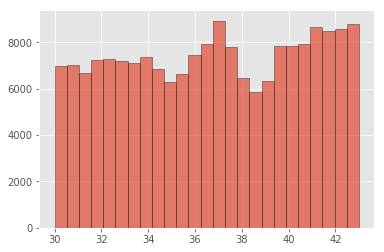

In [2]:
path_tropomi = 'D:/wsy/Data/SIF/TROPO/test/SIF8days0930_1007/'
t_unit_tropomi = "seconds since 1970-01-01 00:00:00"
t_cal = u"gregorian"
latMin = 30.
latMax = 43.
lonMin = 110.
lonMax = 123.
print('1')
tropomi_HHH = L2(path_tropomi+'TROPO*.nc', dict_tropomi,latMin, latMax, lonMin, lonMax)
tropomi_HHH.time_python = convert_time(tropomi_HHH.time, t_unit_tropomi, t_cal)
print('2')
plt.hist(tropomi_HHH.lat,bins = 25,edgecolor="black", alpha=0.7)

In [3]:
dict_tropomi

NameError: name 'dict_tropomi' is not defined

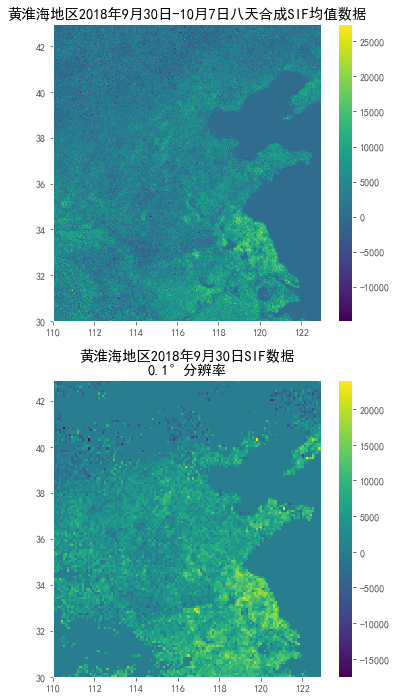

In [28]:
def sif_array(step,lonMax,lonMin,latMax,latMin,tropomi_data):
    #输入L2结果数据集、分辨率（step），空间范围，输出一个数组
    arr_height = int((lonMax-lonMin)/step)
    lat_arr,lon_arr = np.mgrid[latMin:latMax:step,lonMin:lonMax:step]
    sif_arr = np.zeros_like(lat_arr)
    sif_arr = sif_arr-99 #把没有sif数据的区域存储为-99
    for x in range(arr_height): 
        lat_min = latMin+x*step
        lat_max = latMin+(x+1)*step
        for y in range(arr_height):
            lon_min = lonMin+y*step
            lon_max = lonMin+(y+1)*step
            index = np.where((tropomi_data.lon >= lon_min)&(tropomi_data.lon <= lon_max)&(tropomi_data.lat >= lat_min)&(tropomi_data.lat <= lat_max)) 
            index_LT0 = np.where(tropomi_data.sif[index] > 0)#排除小于0的数据
            if tropomi_data.sif[index].size > 0:# 如果区域内sif数据不为空，取平均或者最大值为区域代表值
                sif_mean = tropomi_data.sif[index].mean()*10000
                sif_arr[x,y] = sif_mean
    return(sif_arr)

plt.figure(figsize = (6,12))
plt.rcParams['font.sans-serif']=['SimHei']
sif_arr = sif_array(0.05,lonMax,lonMin,latMax,latMin,tropomi_HHH)
plt.subplot(211)
lat_arr,lon_arr = np.mgrid[latMin:latMax:0.05,lonMin:lonMax:0.05]
plt.pcolor(lon_arr,lat_arr,sif_arr)
plt.title('黄淮海地区2018年9月30日-10月7日八天合成SIF均值数据')
plt.rcParams['axes.unicode_minus'] = False
plt.colorbar()

tropomi_daily_path = 'D:/wsy/Data/SIF/TROPO/ungridded/TROPO_SIF_2018-09-30_ungridded.nc'
tropomi_daily_0930 = L2(tropomi_daily_path, dict_tropomi,latMin, latMax, lonMin, lonMax)
tropomi_daily_0930.time_python = convert_time(tropomi_daily_0930.time, t_unit_tropomi, t_cal)
sif_arr2 = sif_array(0.1,lonMax,lonMin,latMax,latMin,tropomi_daily_0930)
lat_arr2,lon_arr2 = np.mgrid[latMin:latMax:0.1,lonMin:lonMax:0.1]
plt.subplot(212)
plt.pcolor(lon_arr2,lat_arr2,sif_arr2)
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('''黄淮海地区2018年9月30日SIF数据
0.1°分辨率''')
plt.colorbar()
plt.show()



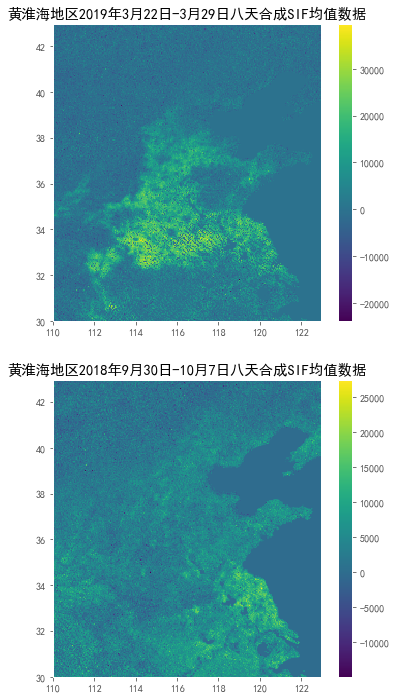

In [27]:
path_tropomi_201903 = 'D:/wsy/Data/SIF/TROPO/test/SIF8days0322_0329/'
tropomi_201903 = L2(path_tropomi_201903+'TROPO*.nc', dict_tropomi,latMin, latMax, lonMin, lonMax)
tropomi_201903.time_python = convert_time(tropomi_201903.time, t_unit_tropomi, t_cal)

plt.figure(figsize = (6,12))
sif_arr = sif_array(0.05,lonMax,lonMin,latMax,latMin,tropomi_201903)
plt.subplot(211)
lat_arr,lon_arr = np.mgrid[latMin:latMax:0.05,lonMin:lonMax:0.05]
plt.pcolor(lon_arr,lat_arr,sif_arr)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('黄淮海地区2019年3月22日-3月29日八天合成SIF均值数据')
plt.colorbar()

sif_arr = sif_array(0.05,lonMax,lonMin,latMax,latMin,tropomi_HHH)
plt.subplot(212)
lat_arr,lon_arr = np.mgrid[latMin:latMax:0.05,lonMin:lonMax:0.05]
plt.pcolor(lon_arr,lat_arr,sif_arr)
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('黄淮海地区2018年9月30日-10月7日八天合成SIF均值数据')
plt.colorbar()

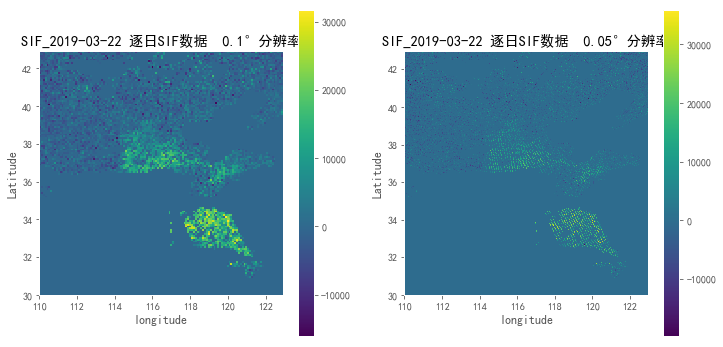

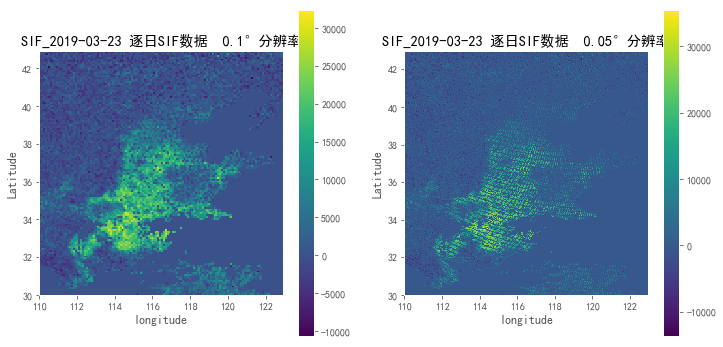

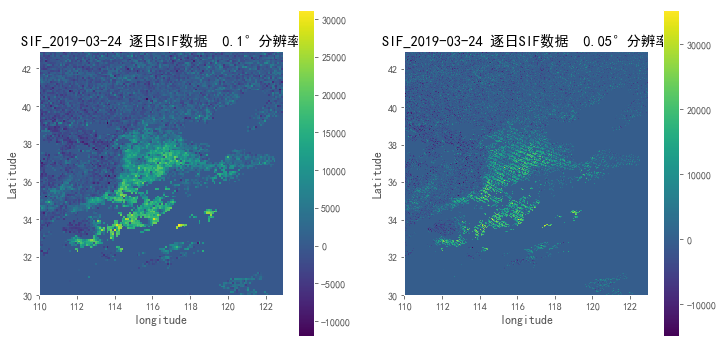

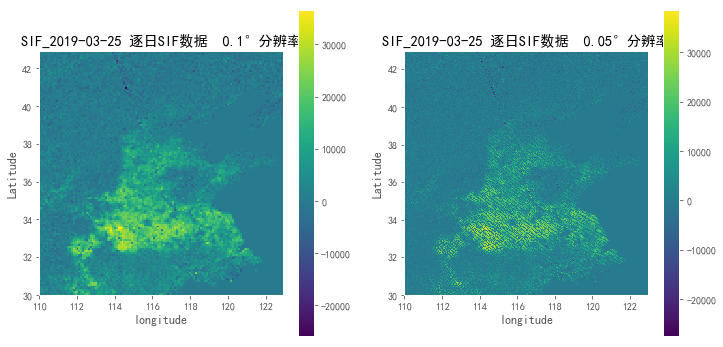

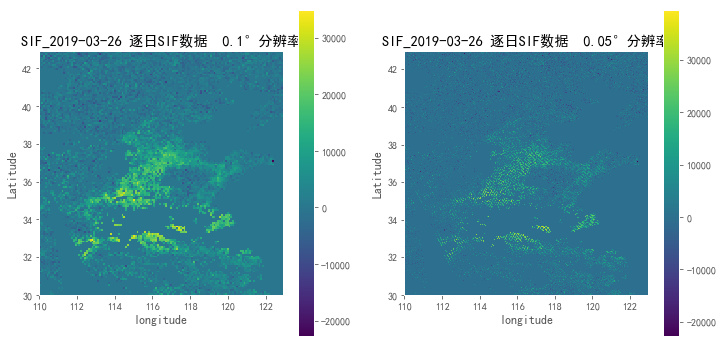

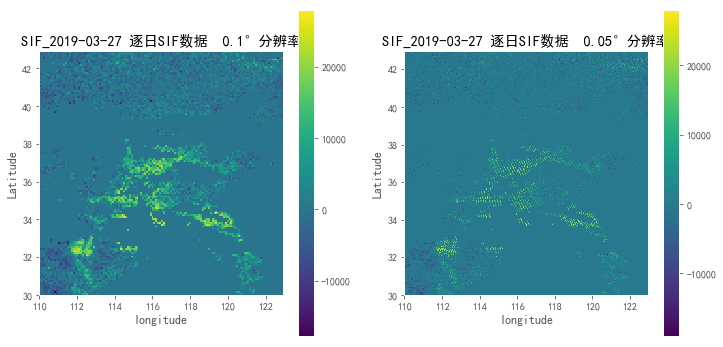

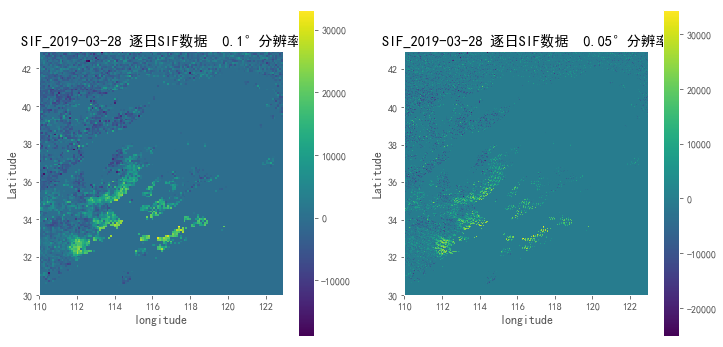

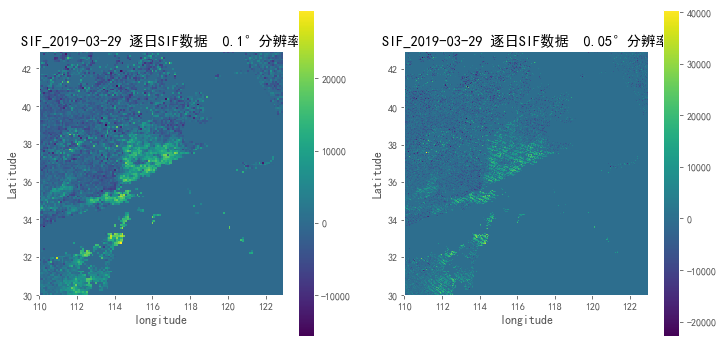

In [26]:
#plot 逐日的sif数据
path_tropomi_201903 = 'D:/wsy/Data/SIF/TROPO/test/SIF8days0322_0329/*.nc'
filelist = glob.glob(path_tropomi_201903)
file_len = len(filelist)
i = 0
for file in filelist:
    i+=1
    tropomi_201903_daily = L2(file, dict_tropomi,latMin, latMax, lonMin, lonMax)
    tropomi_201903_daily.time_python = convert_time(tropomi_201903_daily.time, t_unit_tropomi, t_cal)
    sif_arr = sif_array(0.1,lonMax,lonMin,latMax,latMin,tropomi_201903_daily)
    lat_arr,lon_arr = np.mgrid[latMin:latMax:0.1,lonMin:lonMax:0.1]
    
   
    
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(sif_arr, cmap='viridis', extent=[lon_arr.min(), lon_arr.max(), lat_arr.min(), lat_arr.max()],interpolation='none', origin='lower')
    #plt.pcolor(lon_arr,lat_arr,sif_arr)
    plt.grid(None)
    plt.ylabel('Latitude')
    plt.xlabel('longitude')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.title(file[-27:-13]+' 逐日SIF数据'+'  0.1°分辨率')
    plt.colorbar()
    
    
    sif_arr = sif_array(0.05,lonMax,lonMin,latMax,latMin,tropomi_201903_daily)
    lat_arr,lon_arr = np.mgrid[latMin:latMax:0.05,lonMin:lonMax:0.05]
    plt.subplot(122)
    plt.imshow(sif_arr, cmap='viridis', extent=[lon_arr.min(), lon_arr.max(), lat_arr.min(), lat_arr.max()],interpolation='none', origin='lower')
    plt.grid(None)
    plt.ylabel('Latitude')
    plt.xlabel('longitude')
    plt.title(file[-27:-13]+' 逐日SIF数据'+'  0.05°分辨率')
    plt.colorbar()
    #if i == 1: break
    

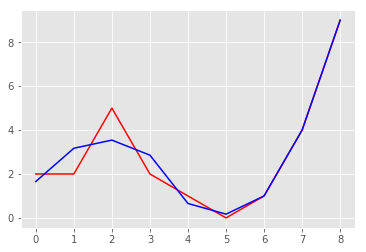

In [10]:
#测试sg信号滤波功能函数
from scipy.signal import savgol_filter
x = tropomi_201903.sif[100,100]
y = savgol_filter(x, 5,2)
plt.plot(x,c='r')
plt.plot(y,c='b')

In [ ]:
plt.plot(tropomi_201903.time_python, tropomi_201903.sif,'.')

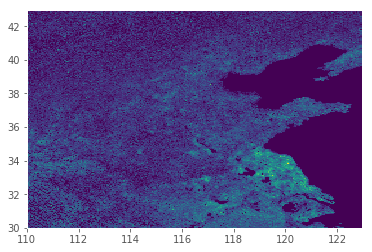

In [29]:
step = 0.05
arr_height = int((lonMax-lonMin)/step)
lat_arr,lon_arr = np.mgrid[latMin:latMax:step,lonMin:lonMax:step]

sif_arr = np.zeros_like(lat_arr)
sif_arr = sif_arr-99. #把没有sif数据的区域存储为-99
for x in range(arr_height): 
    lat_min = latMin+x*step
    lat_max = latMin+(x+1)*step
    for y in range(arr_height):
        lon_min = lonMin+y*step
        lon_max = lonMin+(y+1)*step
        index = np.where((tropomi_HHH.lon >= lon_min)&(tropomi_HHH.lon <= lon_max)&(tropomi_HHH.lat >= lat_min)&(tropomi_HHH.lat <= lat_max)) 
        #print(index)
        if tropomi_HHH.sif[index].size > 0: # 如果区域内sif数据不为空，取平均或者最大值为区域代表值
            sif_max = tropomi_HHH.sif[index].max()*10000
            index_LT0 = np.where(tropomi_HHH.sif[index] > 0)#排除小于0的数据
            if tropomi_HHH.sif[index][index_LT0].size > 0:
                sif_mean = tropomi_HHH.sif[index][index_LT0].mean()*10000
                sif_arr[x,y] = sif_mean
            #print(tropomi_HHH.sif[index][index_LT0])
            #print(sif_max,sif_mean)
            #plt.hist(tropomi_HHH.sif[index], bins=40, edgecolor="black", alpha=0.7)

levels = plt.pcolor(lon_arr,lat_arr,sif_arr)

In [30]:
print(sif_arr[0,50:100])

[ 4017.00019836  6432.49988556  3919.99989748  2378.00002098
  2164.99999166  8509.5000267   3764.66661692 14923.00033569
  6247.33328819  6634.5000267   7890.33353329  5958.99999142
  1974.66671467  5310.0001812   4469.99996901  6589.00022507
  3422.99997807  3659.49988365 11905.00020981 10263.99970055
  5505.99992275  4758.99994373  4032.33319521  3688.00014257
  3737.50001192  1351.00007057  1586.50010824  6266.49975777
  3869.6667552   5423.33304882  4367.0001626   2038.50001097
  4239.00008202   -99.           -99.          3589.99997377
  2971.3332653   6240.00012875  6841.75014496  8575.24991035
  8900.25019646 10032.99951553  9256.33370876  4163.50007057
  6161.00013256  9246.99962139  3804.99988794  6727.24962234
  5364.00020123  4210.00003815]


**仿射地理变换**
GDAL数据集有两种方式表示栅格数据中像元位置（图像中某个点在影像中的行列号）和投影坐标系（不是经纬度，是投影到二维平面的地图坐标，二者可以通过地图投影进行相互转换）间的关系：仿射变换和GCP点。大部分数据都是用仿射变换描述的，本节中描述仿射变换。

仿射变换由六个参数实现， GDALDataset::GetGeoTransform() 可以获取仿射变换参数数组。将像元位置转换为投影坐标的公式如下：


六个参数分别是：
- geos[0]  top left x 左上角x坐标
- geos[1]  w-e pixel resolution 东西方向像素分辨率
- geos[2]  rotation, 0 if image is "north up" 旋转角度，正北向上时为0
- geos[3]  top left y 左上角y坐标
- geos[4]  rotation, 0 if image is "north up" 旋转角度，正北向上时为0
- geos[5]  n-s pixel resolution 南北向像素分辨率
- x/y为图像的x/y坐标，geox/geoy为对应的投影坐标

- geox = geos[0] + geos[1] * x + geos[2] * y
- geoy = geos[3] + geos[4] * x + geos[5] * y

注意，上面所说的点/线坐标系是从左上角(0,0)点到右下角，也就是坐标轴从左到右增长，从上到下增长的坐标系（即影象的行列从左下角开始计算）。 点/线位置中心是(0.5,0.5)

In [38]:
from osgeo import gdal
from osgeo import ogr,osr
dataset = gdal.Open("D:/wsy/Data/SIF/TROPO/test/lst.tif")
im_geotrans = dataset.GetGeoTransform()
im_proj = dataset.GetProjection()
del dataset



In [43]:
#将sif存成tiff
if 'int8' in sif_arr.dtype.name:
    datatype = gdal.GDT_Byte
elif 'int16' in sif_arr.dtype.name:
    datatype = gdal.GDT_UInt16
elif 'float64' in sif_arr.dtype.name:
    datatype = gdal.GDT_Float64
else:
    datatype = gdal.GDT_Float32
    
def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Float64)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

rasterOrigin = (110,43)
pixelWidth = 0.05
pixelHeight = -0.05
newRasterfn = 'D:/wsy/Data/SIF/TROPO/test/sif3.tif'
reversed_arr = sif_arr[::-1]
array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr)

-----------
> 循环读入nc文件，存为数组，导出为tif文件

In [4]:
from netCDF4 import Dataset
import numpy as np
import sys
import xarray as xr
from L2_tools import *
from glob import glob
from osgeo import gdal
from osgeo import ogr,osr
import os

def sif_array(step,lonMax,lonMin,latMax,latMin,tropomi_data):
    #输入L2结果数据集、分辨率（step），空间范围，输出一个数组
    arr_height = int((lonMax-lonMin)/step)
    lat_arr,lon_arr = np.mgrid[latMin:latMax:step,lonMin:lonMax:step]
    sif_arr = np.zeros_like(lat_arr)
    sif_arr = sif_arr-99 #把没有sif数据的区域存储为-99
    for x in range(arr_height): 
        lat_min = latMin+x*step
        lat_max = latMin+(x+1)*step
        for y in range(arr_height):
            lon_min = lonMin+y*step
            lon_max = lonMin+(y+1)*step
            index = np.where((tropomi_data.lon >= lon_min)&(tropomi_data.lon <= lon_max)&(tropomi_data.lat >= lat_min)&(tropomi_data.lat <= lat_max)) 
            index_LT0 = np.where(tropomi_data.sif[index] > 0)#排除小于0的数据
            if tropomi_data.sif[index].size > 0:# 如果区域内sif数据不为空，取平均或者最大值为区域代表值
                sif_mean = tropomi_data.sif[index].mean()*10000
                sif_arr[x,y] = sif_mean
    return(sif_arr)

def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Float64)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()
    
path  = 'D:/wsy/Data/SIF/TROPO/ungridded/'
outpath = 'D:/wsy/Data/SIF/TROPO/tiff/0.2/'
filelist = glob(path+'*.nc')
filelen= len(filelist)

for file in filelist:
    try:
        filelen = filelen - 1
        path_tropomi = file
        t_unit_tropomi = "seconds since 1970-01-01 00:00:00"
        t_cal = u"gregorian"
        latMin = 30.
        latMax = 43.
        lonMin = 110.
        lonMax = 123.
        tropomi_HHH = L2(path_tropomi, dict_tropomi,latMin, latMax, lonMin, lonMax)
        tropomi_HHH.time_python = convert_time(tropomi_HHH.time, t_unit_tropomi, t_cal)
        sif_arr = sif_array(0.2,lonMax,lonMin,latMax,latMin,tropomi_HHH)

        #输出tiff
        rasterOrigin = (110,43)#输出tiff左上角经纬度
        pixelWidth = 0.2
        pixelHeight = -0.2
        newRasterfn = outpath+str(os.path.basename(file)[:-3])+'.tif'
        reversed_arr = sif_arr[::-1]
        array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr)
        print(newRasterfn+'   还剩下_'+str(filelen)+'_个文件。')
    except:
        print('这个文件出错了')
        continue

D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-01_ungridded.tif   还剩下_210_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-02_ungridded.tif   还剩下_209_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-03_ungridded.tif   还剩下_208_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-04_ungridded.tif   还剩下_207_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-05_ungridded.tif   还剩下_206_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-06_ungridded.tif   还剩下_205_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-07_ungridded.tif   还剩下_204_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-08_ungridded.tif   还剩下_203_个文件。
这个文件出错了
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-10_ungridded.tif   还剩下_201_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-11_ungridded.tif   还剩下_200_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-12_ungridded.tif   还剩下_199_个文件。
D:/wsy/Data/SIF/TROPO/tiff/0.2/TROPO_SIF_2018-09-13_ungridded.tif   还剩下_198_个文件。
D:/wsy/Data/SIF/TROP

In [3]:

from netCDF4 import Dataset
import numpy as np
import sys
import xarray as xr
from L2_tools import *
from glob import glob
from osgeo import gdal
from osgeo import ogr,osr
import os

 #输出tiff为length of day 矫正后的sif数据，取0.1分辨率的最大值作为代表输出

def sif_array(step,lonMax,lonMin,latMax,latMin,tropomi_data):
    #输入L2结果数据集、分辨率（step），空间范围，输出一个数组
    arr_height = int((lonMax-lonMin)/step)
    lat_arr,lon_arr = np.mgrid[latMin:latMax:step,lonMin:lonMax:step]
    sif_arr = np.zeros_like(lat_arr)
    sif_arr = sif_arr-99 #把没有sif数据的区域存储为-99
    for x in range(arr_height): 
        lat_min = latMin+x*step
        lat_max = latMin+(x+1)*step
        for y in range(arr_height):
            lon_min = lonMin+y*step
            lon_max = lonMin+(y+1)*step
            index = np.where((tropomi_data.lon >= lon_min)&(tropomi_data.lon <= lon_max)&(tropomi_data.lat >= lat_min)&(tropomi_data.lat <= lat_max)) 
            index_LT0 = np.where(tropomi_data.dcSIF[index] > 0)#排除小于0的数据
            if tropomi_data.dcSIF[index].size > 0:# 如果区域内sif数据不为空，取平均或者最大值为区域代表值
                sif_mean = tropomi_data.dcSIF[index].max()*10000
                sif_arr[x,y] = sif_mean
    return(sif_arr)

def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Float64)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()
    
path  = 'D:/wsy/Data/SIF/TROPO/ungridded/'
outpath = 'D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/'
filelist = glob(path+'*.nc')
filelen= len(filelist)

for file in filelist:
    try:
        filelen = filelen - 1
        path_tropomi = file
        t_unit_tropomi = "seconds since 1970-01-01 00:00:00"
        t_cal = u"gregorian"
        latMin = 30.
        latMax = 43.
        lonMin = 110.
        lonMax = 123.
        tropomi_HHH = L2(path_tropomi, dict_tropomi,latMin, latMax, lonMin, lonMax)
        tropomi_HHH.time_python = convert_time(tropomi_HHH.time, t_unit_tropomi, t_cal)
        sif_arr = sif_array(0.1,lonMax,lonMin,latMax,latMin,tropomi_HHH)

        #输出tiff
        rasterOrigin = (110,43)#输出tiff左上角经纬度
        pixelWidth = 0.1
        pixelHeight = -0.1
        newRasterfn = outpath+str(os.path.basename(file)[:-3])+'.tif'
        reversed_arr = sif_arr[::-1]
        array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr)
        print(newRasterfn+'   还剩下_'+str(filelen)+'_个文件。')
    except:
        print('这个文件出错了')
        continue

D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-01_ungridded.tif   还剩下_210_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-02_ungridded.tif   还剩下_209_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-03_ungridded.tif   还剩下_208_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-04_ungridded.tif   还剩下_207_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-05_ungridded.tif   还剩下_206_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-06_ungridded.tif   还剩下_205_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-07_ungridded.tif   还剩下_204_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-08_ungridded.tif   还剩下_203_个文件。
这个文件出错了
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-10_ungridded.tif   还剩下_201_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-11_ungridded.tif   还剩下_200_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MAX/TROPO_SIF_2018-09-12_ungridded.tif   还剩下_199_个文件。
D:/wsy/Data/SIF/TROPO/tiff/dcSIF/MA

In [1]:
from L2_tools import *
dict_tropomi

{'lat': 'lat',
 'lon': 'lon',
 'sza': 'sza',
 'vza': 'vza',
 'phaseAngle': 'phase_angle',
 'sif': 'sif',
 'sif_sigma': 'sif_err',
 'dcCorr': 'daily_correction_factor',
 'time': 'TIME',
 'dcSIF': 'dcSIF'}